In [1]:
import urllib

In [2]:
url = "https://covid.ourworldindata.org/data/ecdc/full_data.csv"

In [9]:
urllib.request.urlretrieve(url)

('/var/folders/mk/20zq0j3j3d57g15nyd4whm100000gn/T/tmpchuulsq6',
 <http.client.HTTPMessage at 0x103abc8d0>)

In [12]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [22]:
cvd = pd.read_csv(url)

In [23]:
cvd['date'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in cvd['date']]

In [27]:
cvd.dtypes, cvd.shape

(date            datetime64[ns]
 location                object
 new_cases                int64
 new_deaths               int64
 total_cases              int64
 total_deaths             int64
 dtype: object, (6452, 6))

In [39]:
countries = ["Thailand"]
cvd_countries = cvd[cvd.location.isin(countries)]

In [40]:
cvd_countries.set_index('date', inplace=True)

In [42]:
cvd_countries.tail()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-03-19,Thailand,0,0,177,1
2020-03-20,Thailand,35,0,212,1
2020-03-21,Thailand,154,0,366,1
2020-03-22,Thailand,233,0,599,1
2020-03-23,Thailand,122,0,721,1


In [43]:
cvd_countries['mortality_rate'] = cvd_countries['total_deaths']/cvd_countries['total_cases']

/Users/poomwarawat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
cvd_countries.tail()

,location,new_cases,new_deaths,total_cases,total_deaths,mortality_rate
date,,,,,,
2020-03-19,Thailand,0,0,177,1,0.005650
2020-03-20,Thailand,35,0,212,1,0.004717
2020-03-21,Thailand,154,0,366,1,0.002732
2020-03-22,Thailand,233,0,599,1,0.001669
2020-03-23,Thailand,122,0,721,1,0.001387


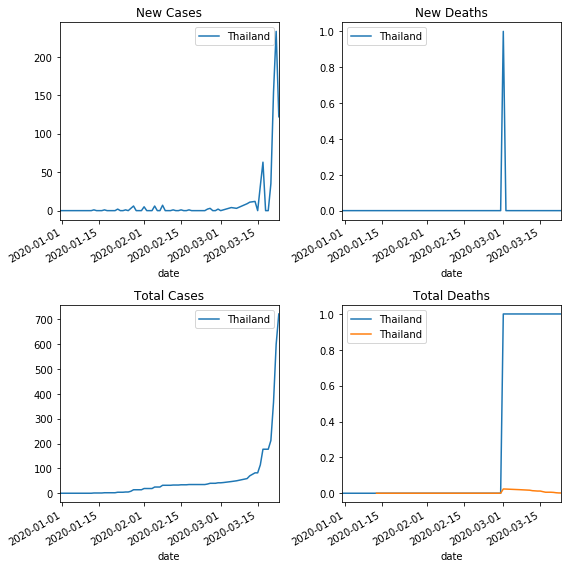

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

cvd_countries.groupby('location')['new_cases'].plot(ax=axes[0,0], legend=True) #for log scale add logy=True
cvd_countries.groupby('location')['new_deaths'].plot(ax=axes[0,1], legend=True)
cvd_countries.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
cvd_countries.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)
cvd_countries.groupby('location')['mortality_rate'].plot(ax=axes[1,1], legend=True)
#CVD_country.to_csv('data/output.csv')

axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")

fig.tight_layout()